In [1]:
#4ci) Adagrad SGD OLS

(array([1]), array([0]))
method MSE= 5.196980007179669e-06


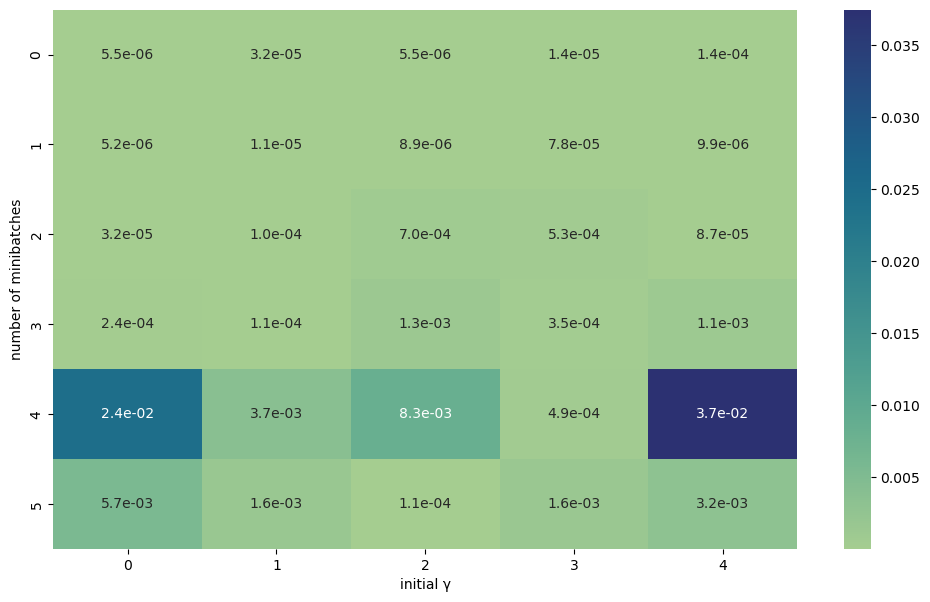

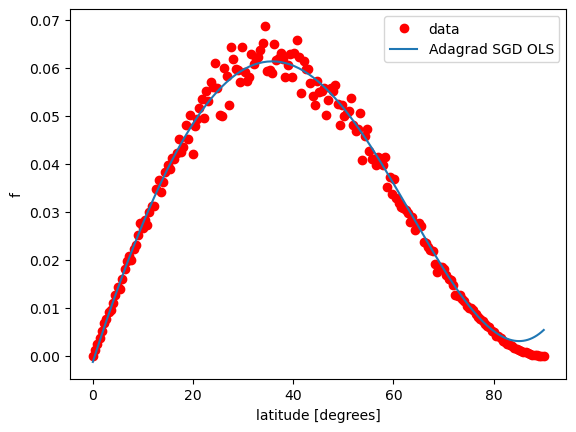

execution time= 3.218650817871094e-05 s


In [2]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from math import exp, sqrt
from random import random, seed

def MSE(y_data,y_model):
    n= np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

n_epochs = 10000 

nsizes= 6
sizes=[1, 2, 4, 8, 16, 32]

ngammas = 5 
gammas = np.logspace(-3, -2, ngammas)

y_OLS_SGD_ada_array = np.zeros((nsizes, ngammas), dtype=object)
MSE_OLS_SGD_ada = np.zeros((nsizes, ngammas))
    
for s in range(nsizes):
    M=sizes[s] #we vary the size of the minibatches
    
    for g in range(ngammas):# we vary the value for the initial learning rate
        gamma = gammas[g]

        m = int(n/M) #number of minibatches

        # Including AdaGrad parameter to avoid possible division by zero
        delta  = 1e-8

        beta_OLS = np.random.randn(degree+1,1)

        for epoch in range(n_epochs): 

            Giter = np.zeros(shape=(degree+1,degree+1))

            for i in range(m):
                random_index = M*np.random.randint(m)
                xi = X[random_index:random_index+M]
                yi = y_noisy[random_index:random_index+M]

                gradient_OLS = (2.0/M)* xi.T @ ((xi @ beta_OLS)-yi)

                # Calculate the outer product of the gradients
                Giter +=gradient_OLS @ gradient_OLS.T

                # Simpler algorithm with only diagonal elements
                Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Giter)))]

                # compute update
                update = np.multiply(Ginverse,gradient_OLS)

                beta_OLS -= update

        y_OLS_SGD_ada = X @ beta_OLS
        
        y_OLS_SGD_ada_array[s, g] = y_OLS_SGD_ada
        
        MSE_OLS_SGD_ada[s, g] = MSE(y_OLS_SGD_ada, y_noisy)
        
#finding the minimum value of the MSE
MSE_OLS_SGD_ada_optimal = np.min(MSE_OLS_SGD_ada)
conditon = (MSE_OLS_SGD_ada == MSE_OLS_SGD_ada_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

print('method MSE=', MSE_OLS_SGD_ada_optimal)  

#saving the y that gives the optimal MSE
y_OLS_SGD_ada_optimal= y_OLS_SGD_ada_array[result]
y_OLS_SGD_ada_optimal=(y_OLS_SGD_ada_optimal[0])
#print(y_Ridge_GD_optimal)             
        
import pandas as pd
import seaborn as sns

pd.DataFrame(MSE_OLS_SGD_ada)
mse_data_ols_sgd_ada = pd.DataFrame(MSE_OLS_SGD_ada)

plt.figure(figsize=(12,7))
sns.heatmap(data=mse_data_ols_sgd_ada, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("initial γ")
plt.ylabel("number of minibatches")
plt.show()

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
plt.plot(x*180/np.pi, y_OLS_SGD_ada_optimal, label='Adagrad SGD OLS')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [3]:
#4cii) Adagrad SGD Ridge  

(array([1]), array([1]))
method MSE= 8.312058370444121e-06


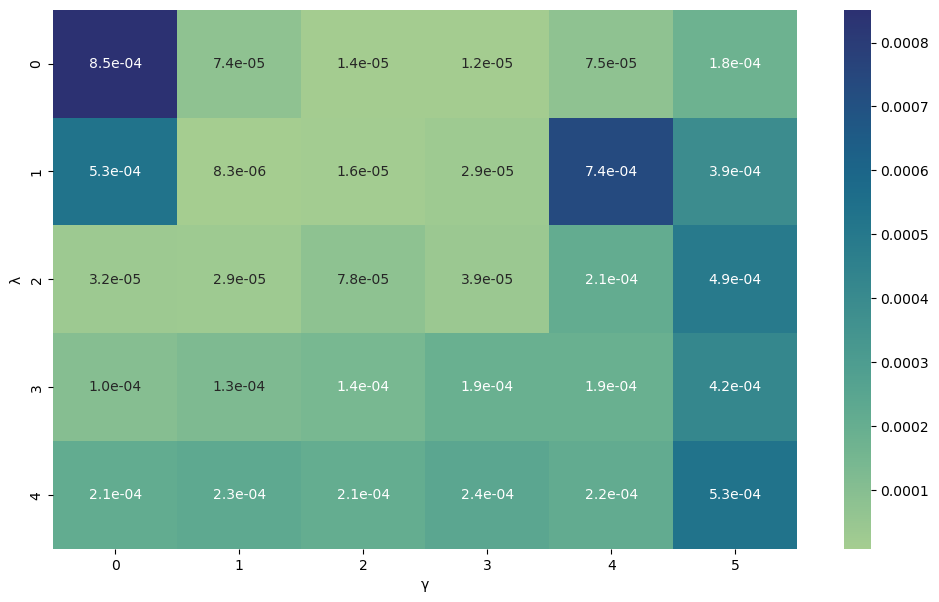

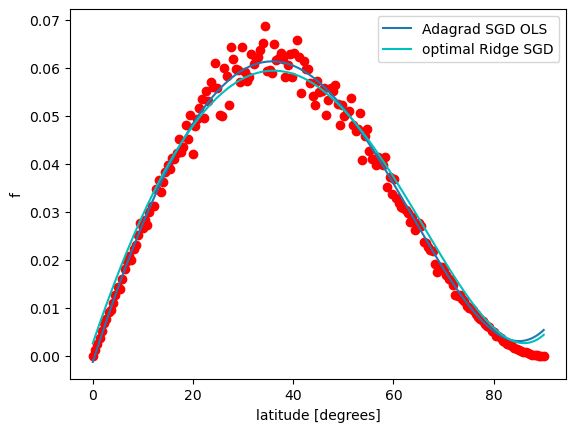

execution time= 3.3855438232421875e-05 s


In [5]:
#Ridge parameter
nlambdas = 5 
lambdas = np.logspace(-5, -1, nlambdas)

ngammas = 6 
gammas = np.logspace(-3, -1, ngammas)

y_Ridge_SGD_ada_array = np.zeros((nlambdas, ngammas), dtype=object)
MSE_Ridge_SGD_ada = np.zeros((nlambdas, ngammas))

n_epochs = 1000
M=1   
m = int(n/M) #number of minibatches

for l in range(nlambdas):
    lmbda = lambdas[l]
    beta_Ridge = np.random.randn(degree+1,1)    
    MSE_Ridge_SGD = np.zeros(nlambdas)

    # We vary the learning rate
    for g in range(ngammas):
        gamma=gammas[g]

        # Including AdaGrad parameter to avoid possible division by zero
        delta  = 1e-8    

        for epoch in range(n_epochs):

            Giter = np.zeros(shape=(degree+1,degree+1))    

            for i in range(m):
                random_index = M*np.random.randint(m)
                xi = X[random_index:random_index+M]
                yi = y_noisy[random_index:random_index+M]

                gradient_Ridge = (2.0/M)*xi.T @ (xi @ (beta_Ridge)-yi)+2*lmbda*beta_Ridge

                # Calculate the outer product of the gradients
                Giter +=gradient_Ridge @ gradient_Ridge.T

                # Simpler algorithm with only diagonal elements
                Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Giter)))]

                # compute update
                update = np.multiply(Ginverse,gradient_Ridge)
                beta_Ridge -= update

        y_Ridge_SGD_ada = X @ beta_Ridge
        
        y_Ridge_SGD_ada_array[l, g] = y_Ridge_SGD_ada

        MSE_Ridge_SGD_ada[l, g]=MSE(y_noisy, y_Ridge_SGD_ada)
               
#finding the minimum value of the MSE
MSE_Ridge_SGD_ada_optimal = np.min(MSE_Ridge_SGD_ada)
conditon = (MSE_Ridge_SGD_ada == MSE_Ridge_SGD_ada_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

print('method MSE=', MSE_Ridge_SGD_ada_optimal)  

#saving the y that gives the optimal MSE
y_Ridge_SGD_ada_optimal= y_Ridge_SGD_ada_array[result]
y_Ridge_SGD_ada_optimal=(y_Ridge_SGD_ada_optimal[0])
            
pd.DataFrame(MSE_Ridge_SGD_ada)
mse_data_ridge_sgd_ada = pd.DataFrame(MSE_Ridge_SGD_ada)

plt.figure(figsize=(12,7))
sns.heatmap(data=mse_data_ridge_sgd_ada, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("γ")
plt.ylabel("λ")
plt.show()            

plt.plot(x*180/np.pi, y_noisy, 'ro')
plt.plot(x*180/np.pi, y_OLS_SGD_ada_optimal, label='Adagrad SGD OLS')
plt.plot(x*180/np.pi, y_Ridge_SGD_ada_optimal, 'c-', label = 'optimal Ridge SGD')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()        

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')